In [2]:
'''
Affinity Propagation

모든 데이터가 특정한 기준에 따라 자신을 대표할 대표 데이터를 선택한다. 만약 스스로가 자기 자신을 대표하게 되면 클러스터의 중심이 된다.

responsibility  r(i,k) 
k 번째 데이터가  i 번째 데이터의 대표가 되어야 한다는 근거
availability  a(i,k) 
i 번째 데이터가  k 번째 데이터를 대표로 선택해야 한다는 근거

[Affinity Propagation](https://datascienceschool.net/view-notebook/3bd9864b09d0466995134220f6779d6d/)
'''

'\nAffinity Propagation\n\n모든 데이터가 특정한 기준에 따라 자신을 대표할 대표 데이터를 선택한다. 만약 스스로가 자기 자신을 대표하게 되면 클러스터의 중심이 된다.\n\nresponsibility  r(i,k) \nk 번째 데이터가  i 번째 데이터의 대표가 되어야 한다는 근거\navailability  a(i,k) \ni 번째 데이터가  k 번째 데이터를 대표로 선택해야 한다는 근거\n'

In [5]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import *
import matplotlib.pyplot as plt

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)

model = AffinityPropagation(preference=-50).fit(X)

cluster_centers_indices = model.cluster_centers_indices_
labels = model.labels_
n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Adjusted Rand Index: %0.3f" % adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f" % adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels, metric='sqeuclidean'))

Estimated number of clusters: 3
Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.871
Silhouette Coefficient: 0.753


/home/jhkim/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


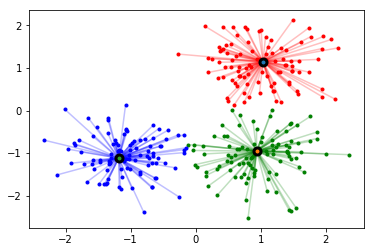

In [6]:
from itertools import cycle

colors = cycle('rgb')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col, alpha=0.25)
    plt.plot(cluster_center[0], cluster_center[1], 'o', mec='k', mew=3, markersize=7)

plt.show()